In [1]:
from DataAndCodeAssignment3 import ps_utils
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la


********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



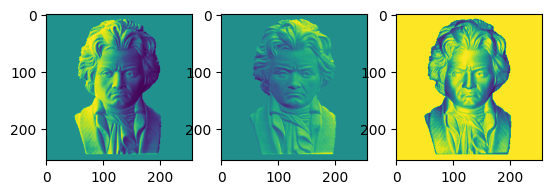

In [31]:
# read Beethoven data
I, mask, S = ps_utils.read_data_file('./DataAndCodeAssignment3/Beethoven4')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

# for each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]


# solve for M = rho*N
iS = la.inv(S)
M = np.dot(iS, J)

# get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))
n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)
plt.imshow(mask)

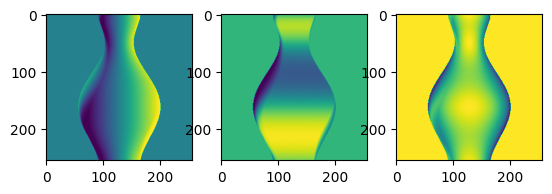

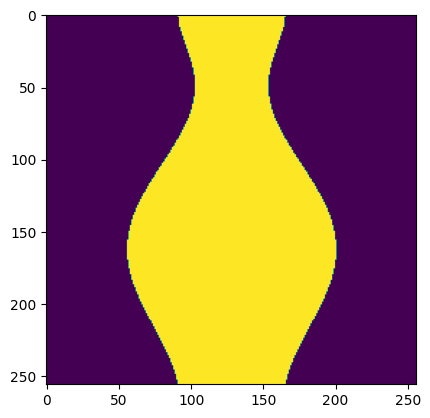

In [3]:
# read Beethoven data
I, mask, S = ps_utils.read_data_file('./DataAndCodeAssignment3/mat_vase')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

# for each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]


# solve for M = rho*N
iS = la.inv(S)
M = np.dot(iS, J)

# get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))
n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)
plt.imshow(mask)

M_shape:  (3, 24828)


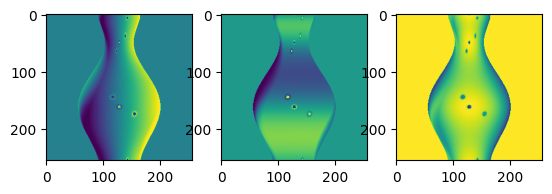

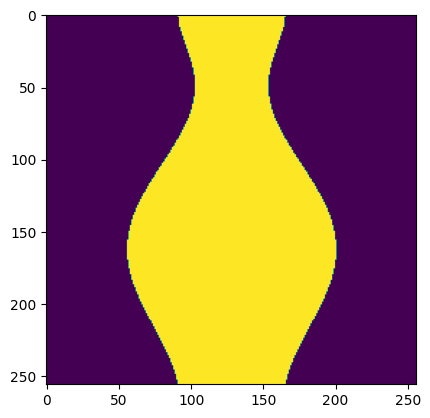

In [2]:
# read Beethoven data
I, mask, S = ps_utils.read_data_file('./DataAndCodeAssignment3/shiny_vase')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

# for each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]


# solve for M = rho*N
iS = la.inv(S)
M = np.dot(iS, J)

print("M_shape: ", M.shape)

# get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))
n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)
plt.imshow(mask)

## Exercise 4: Ransac and smoothing (for pdf comment smoothing out)

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************

I (256, 256, 3)
S:  (3, 3)
J:  (3, 24828)
(1, 3)


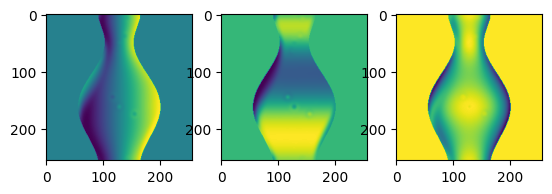

In [1]:
from DataAndCodeAssignment3 import ps_utils
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from scipy.ndimage import gaussian_filter as gaussian_filter

# read Beethoven data
I, mask, S = ps_utils.read_data_file('./DataAndCodeAssignment3/shiny_vase')

#print(S.shape)

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape


# for each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]
    
print("I", I.shape)
print("S: ", S.shape)
print("J: ", J.shape)
j_test = np.array([[J[0,0]], [J[1,0]], [J[2,0]]])
print(j_test.T.shape)
#print(J.min(), J.max())
# solve for M = rho*N
#iS = la.inv(S)
#M = np.dot(iS, J)
M = np.zeros((3, J.shape[1]))
for i in range(J.shape[1]):
    j_sample = np.array([[J[0,i]], [J[1,i]], [J[2,i]]])
    best_m, best_inliers, best_fit = ps_utils.ransac_3dvector((j_sample, S), .2, verbose=0)    
    M[0, i] = best_m[0]
    M[1, i] = best_m[1]
    M[2, i] = best_m[2]

#get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))

n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

n1, n2, n3 = ps_utils.smooth_normal_field(n1, n2, n3, mask)


_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)

## Exercise 5: with ransac

I (256, 256, 22)
S:  (22, 3)
J:  (22, 24828)


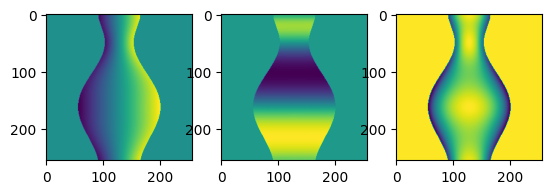

In [13]:
from DataAndCodeAssignment3 import ps_utils
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from scipy.ndimage import gaussian_filter as gaussian_filter

# read Beethoven data
I, mask, S = ps_utils.read_data_file('./DataAndCodeAssignment3/shiny_vase2')

#print(S.shape)

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

num_images = S.shape[0]

# for each mask pixel, collect image data
J = np.zeros((num_images, len(nz[0])))
for i in range(num_images):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]
    
print("I", I.shape)
print("S: ", S.shape)
print("J: ", J.shape)
#print(J.min(), J.max())
# solve for M = rho*N
#iS = la.inv(S)
#M = np.dot(iS, J)
M = np.zeros((3, J.shape[1]))
for i in range(J.shape[1]):
    j_sample = np.array([J[j,i] for j in range(num_images)]).reshape(-1,1)
    
    best_m, best_inliers, best_fit = ps_utils.ransac_3dvector((j_sample, S), 2.0, verbose=0)    
    M[0, i] = best_m[0]
    M[1, i] = best_m[1]
    M[2, i] = best_m[2]

#get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))

n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

n1, n2, n3 = ps_utils.smooth_normal_field(n1, n2, n3, mask)


_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)

## Exercise 5: pseudoinverse

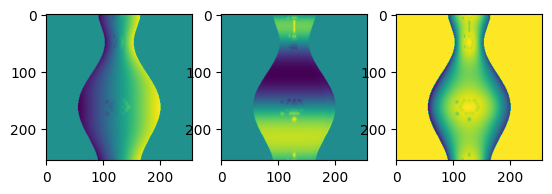

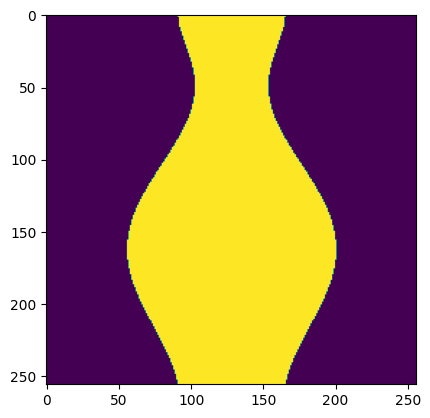

In [12]:
# read Beethoven data
I, mask, S = ps_utils.read_data_file('./DataAndCodeAssignment3/shiny_vase2')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

num_images = S.shape[0]

# for each mask pixel, collect image data
J = np.zeros((num_images, len(nz[0])))
for i in range(num_images):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]


# solve for M = rho*N
iS = la.pinv(S)
M = np.dot(iS, J)

# get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))
n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)
plt.imshow(mask)

## Exercise 6: Buddha Dataset pseudoinverse

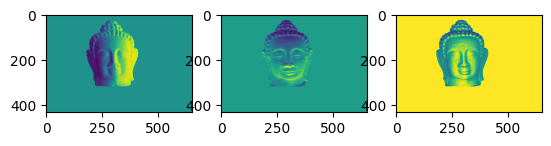

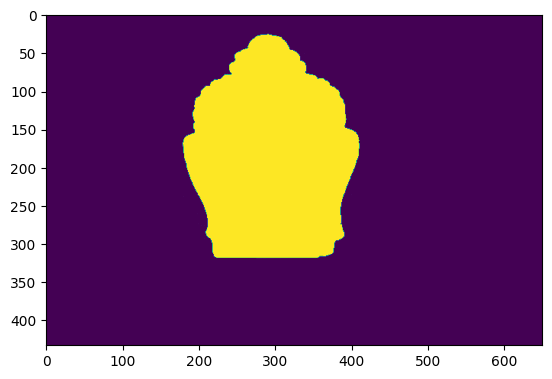

In [14]:
# read Beethoven data
I, mask, S = ps_utils.read_data_file('./DataAndCodeAssignment3/Buddha')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

num_images = S.shape[0]

# for each mask pixel, collect image data
J = np.zeros((num_images, len(nz[0])))
for i in range(num_images):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]


# solve for M = rho*N
iS = la.pinv(S)
M = np.dot(iS, J)

# get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))
n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)
plt.imshow(mask)

## Exercise 6: Buddha ransac

I (433, 650, 10)
S:  (10, 3)
J:  (10, 49872)


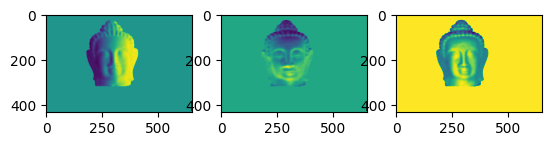

In [20]:
from DataAndCodeAssignment3 import ps_utils
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from scipy.ndimage import gaussian_filter as gaussian_filter

# read Beethoven data
I, mask, S = ps_utils.read_data_file('./DataAndCodeAssignment3/Buddha')

#print(S.shape)

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

num_images = S.shape[0]

# for each mask pixel, collect image data
J = np.zeros((num_images, len(nz[0])))
for i in range(num_images):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]
    
print("I", I.shape)
print("S: ", S.shape)
print("J: ", J.shape)
#print(J.min(), J.max())
# solve for M = rho*N
#iS = la.inv(S)
#M = np.dot(iS, J)
M = np.zeros((3, J.shape[1]))
for i in range(J.shape[1]):
    j_sample = np.array([J[j,i] for j in range(num_images)]).reshape(-1,1)
    
    best_m, best_inliers, best_fit = ps_utils.ransac_3dvector((j_sample, S), 100.0, verbose=0)    
    M[0, i] = best_m[0]
    M[1, i] = best_m[1]
    M[2, i] = best_m[2]

#get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))

n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

n1, n2, n3 = ps_utils.smooth_normal_field(n1, n2, n3, mask)


_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)

## Exercise 7: face

I (96, 84, 27)
S:  (27, 3)
J:  (27, 8064)


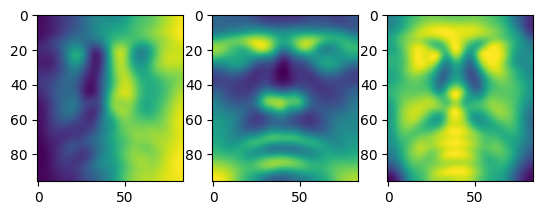

In [21]:
from DataAndCodeAssignment3 import ps_utils
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from scipy.ndimage import gaussian_filter as gaussian_filter

# read Beethoven data
I, mask, S = ps_utils.read_data_file('./DataAndCodeAssignment3/face')

#print(S.shape)

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

num_images = S.shape[0]

# for each mask pixel, collect image data
J = np.zeros((num_images, len(nz[0])))
for i in range(num_images):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]
    
print("I", I.shape)
print("S: ", S.shape)
print("J: ", J.shape)
#print(J.min(), J.max())
# solve for M = rho*N
#iS = la.inv(S)
#M = np.dot(iS, J)
M = np.zeros((3, J.shape[1]))
for i in range(J.shape[1]):
    j_sample = np.array([J[j,i] for j in range(num_images)]).reshape(-1,1)
    
    best_m, best_inliers, best_fit = ps_utils.ransac_3dvector((j_sample, S), 10.0, verbose=0)    
    M[0, i] = best_m[0]
    M[1, i] = best_m[1]
    M[2, i] = best_m[2]

#get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))

n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

n1, n2, n3 = ps_utils.smooth_normal_field(n1, n2, n3, mask)


_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)